<h4>Logistic Regression based on cleaned data of all the houses without House 5, 10, 12, 14 & 30</h4>

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import date, datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn import metrics


register_matplotlib_converters()
sns.set()

# Import the data and making a dataframe out of it
file_name = 'Final_data_cleaned_missing_houses.csv'
df = pd.read_csv(file_name)

# Rename the index columns
df = df.rename(columns={"ID-nummer" : "Index"})
df = df.set_index('Index')
df.index = pd.to_datetime(df.index)

# Adding the dummy variable: Hours
df['Hours'] = df.index.hour

# Adding the dummy variable: Season
Y = 2000 #Leap year to allow input for a leap day (Y-02-29)
seasons = [(1, (date(Y,  1,  1),  date(Y,  3, 20))),
           (2, (date(Y,  3, 21),  date(Y,  6, 20))),
           (3, (date(Y,  6, 21),  date(Y,  9, 22))),
           (4, (date(Y,  9, 23),  date(Y, 12, 20))),
           (1, (date(Y, 12, 21),  date(Y, 12, 31)))]

def get_season(now):
    if isinstance(now, datetime):
        now = now.date()
    now = now.replace(year=Y)
    return next(season for season, (start, end) in seasons
                if start <= now <= end)

df['Season'] = df.index.to_series().apply(lambda x: get_season(x.to_pydatetime()))

# Adding the dummy variable: DayTime
def partofday(hours):
    if (hours >= 0 and hours < 6): 
        return 1
    elif(hours >= 6 and hours < 12): 
        return 2
    elif(hours >= 12 and hours < 18): 
        return 3
    else: 
        return 4   

df['Part_of_the_day'] = df['Hours'].apply(lambda x: partofday(x))

# Adding the dummy variable: Day of the week
def get_day_of_week(date):
    if isinstance(datetime, type(datetime)):
        return date.weekday() + 1
    return np.NaN

df['Day_of_the_week'] = df.index.to_series().apply(lambda x: get_day_of_week(x.to_pydatetime()))

<h5>Logistic Regression with the labels from the dataset</h5>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import date, datetime, timedelta
from pandas.plotting import register_matplotlib_converters
from sklearn.datasets.samples_generator import make_blobs
from sklearn import metrics

register_matplotlib_converters()
sns.set()

# Import the data and making a dataframe out of it
file_name = '../Data/Final_data_cleaned_missing_houses.csv'
df = pd.read_csv(file_name)

# Rename the index columns
df = df.rename(columns={"ID-nummer" : "Index"})
df = df.set_index('Index')
df.index = pd.to_datetime(df.index)

# Import the data and making a dataframe out of it
file_name = '../Data/dataGM_excel2.xlsx'
productionDF = pd.read_excel(file_name, sheet_name='Productie')
consumptionDF = pd.read_excel(file_name, sheet_name='Consumptie')

if (productionDF.index.name is None):
    productionDF = productionDF.set_index('ID-nummer')
if (consumptionDF.index.name is None):
    consumptionDF = consumptionDF.set_index('ID-nummer')
    
df_houses_info = productionDF[0:3]

In [2]:
prod_list = []
cons_list = []

pv_list = []
hs_list = []
ps_list = []

for house in df.columns:
    if('_prod' in house):
        length = len(df[house])
        house_without_prod = house[:-5]
        if('H01' in house):
            prod_list.append(df[house].values)
            pv_list.append([df_houses_info[house_without_prod][1:2]] * length)
            hs_list.append([df_houses_info[house_without_prod][0:1]] * length)
            ps_list.append([df_houses_info[house_without_prod][2:3]] * length)
        else:
            prod_list[0] = np.concatenate((prod_list[0], df[house].values), axis=None)
            pv_list[0] = np.concatenate((pv_list[0], [df_houses_info[house_without_prod][1:2]] * length), axis=None)
            hs_list[0] = np.concatenate((hs_list[0], [df_houses_info[house_without_prod][0:1]] * length), axis=None)
            ps_list[0] = np.concatenate((ps_list[0], [df_houses_info[house_without_prod][2:3]] * length), axis=None)
            print("House " + house + " is done!")
    else:
        if('H01' in house):
            cons_list.append(df[house].values)
        else:
            cons_list[0] = np.concatenate((cons_list[0], df[house].values), axis=None)
            print("House " + house + " is done!")

print(prod_list)
print(len(prod_list[0]))

print(pv_list)
print(len(pv_list[0]))

House H02_prod is done!
House H03_prod is done!
House H04_prod is done!
House H06_prod is done!
House H07_prod is done!
House H08_prod is done!
House H09_prod is done!
House H11_prod is done!
House H13_prod is done!
House H15_prod is done!
House H16_prod is done!
House H17_prod is done!
House H18_prod is done!
House H19_prod is done!
House H20_prod is done!
House H21_prod is done!
House H22_prod is done!
House H23_prod is done!
House H24_prod is done!
House H25_prod is done!
House H26_prod is done!
House H27_prod is done!
House H28_prod is done!
House H29_prod is done!
House H31_prod is done!
House H32_prod is done!
House H33_prod is done!
House H02_cons is done!
House H03_cons is done!
House H04_cons is done!
House H06_cons is done!
House H07_cons is done!
House H08_cons is done!
House H09_cons is done!
House H11_cons is done!
House H13_cons is done!
House H15_cons is done!
House H16_cons is done!
House H17_cons is done!
House H18_cons is done!
House H19_cons is done!
House H20_cons i

In [17]:
list_with_prod_and_pv = {'Production':prod_list[0], 'Consumption':cons_list[0], 'PV-aantal':pv_list[0], 'Personen':ps_list[0], 'Heating System':hs_list[0]}
df_prod_pv = pd.DataFrame(list_with_prod_and_pv)
print(df_prod_pv.head())

df_prod_pv.info()

   Production  Consumption PV-aantal Personen Heating System
0         0.0        0.031        17        4              E
1         0.0        0.037        17        4              E
2         0.0        0.034        17        4              E
3         0.0        0.296        17        4              E
4         0.0        0.311        17        4              E
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1532860 entries, 0 to 1532859
Data columns (total 5 columns):
Production        1532860 non-null float64
Consumption       1532860 non-null float64
PV-aantal         1532860 non-null object
Personen          1532860 non-null object
Heating System    1532860 non-null object
dtypes: float64(2), object(3)
memory usage: 58.5+ MB


In [18]:
#Run this cell only ones!!!
df_prod_pv['Personen'] = df_prod_pv['Personen'].apply(lambda x: x-1)
df_prod_pv['PV-aantal']= df_prod_pv['PV-aantal'].apply(lambda x: x-8)
df_prod_pv.head()

df_prod_pv.replace('E', 1, inplace=True)
df_prod_pv.replace(' E', 1, inplace=True)
df_prod_pv.replace('WP', 2, inplace=True)
df_prod_pv.replace(' WP', 2, inplace=True)
df_prod_pv.replace('Zon', 3, inplace=True)
df_prod_pv.replace(' Zon', 3, inplace=True)

<h5>Target: Heating System</h5>

In [24]:
data = df_prod_pv[['Production', 'Consumption', 'PV-aantal', 'Personen']]
#production = df_prod_pv['Production']
#consumption = df_prod_pv['Consumption']
#data = np.array((production,consumption))
target = df_prod_pv['Heating System']

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('Accuracy on training: {:.3f}'.format(model.score(X_train, y_train)) )
print('Accuracy on test: {:.3f}'.format(model.score(X_test, y_test)))

y_pred = model.predict(X_test)

print('True: ', y_test.values[0:10])
print('False:', y_pred[0:10])

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

/opt/jupyterhub/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/jupyterhub/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy on training: 0.715
Accuracy on test: 0.716
True:  [2 2 1 1 2 2 1 2 1 1]
False: [2 2 1 1 2 2 1 1 1 2]
              precision    recall  f1-score   support

           1       0.72      0.80      0.76    109138
           2       0.71      0.92      0.80    142853
           3       1.00      0.01      0.02     54581

    accuracy                           0.72    306572
   macro avg       0.81      0.58      0.53    306572
weighted avg       0.77      0.72      0.65    306572



<h5>Target: PV-aantal</h5>

In [20]:
data = df_prod_pv[['Production', 'Consumption', 'Heating System', 'Personen']]
#production = df_prod_pv['Production']
#consumption = df_prod_pv['Consumption']
#data = np.array((production,consumption))
target = df_prod_pv['PV-aantal']

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('Accuracy on training: {:.3f}'.format(model.score(X_train, y_train)) )
print('Accuracy on test: {:.3f}'.format(model.score(X_test, y_test)))

y_pred = model.predict(X_test)

print('True: ', y_test.values[0:10])
print('False:', y_pred[0:10])

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

/opt/jupyterhub/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/jupyterhub/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy on training: 0.489
Accuracy on test: 0.488
True:  [7 3 3 1 3 3 3 5 1 7]
False: [6 3 3 9 1 3 3 5 3 3]


/opt/jupyterhub/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.00      0.00      0.00     11185
           1       0.35      0.22      0.27     54621
           2       0.25      0.33      0.29     32849
           3       0.47      0.51      0.49     54802
           4       0.95      0.67      0.78     32702
           5       0.62      0.67      0.64     32988
           6       0.57      0.80      0.67     54362
           7       0.00      0.00      0.00     22117
           9       0.33      1.00      0.50     10946

    accuracy                           0.49    306572
   macro avg       0.39      0.47      0.40    306572
weighted avg       0.45      0.49      0.45    306572



<h5>Target: Personen</h5>

In [21]:
data = df_prod_pv[['Production', 'Consumption', 'Heating System', 'PV-aantal']]
#production = df_prod_pv['Production']
#consumption = df_prod_pv['Consumption']
#data = np.array((production,consumption))
target = df_prod_pv['Personen']

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('Accuracy on training: {:.3f}'.format(model.score(X_train, y_train)) )
print('Accuracy on test: {:.3f}'.format(model.score(X_test, y_test)))

y_pred = model.predict(X_test)

print('True: ', y_test.values[0:10])
print('False:', y_pred[0:10])

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

/opt/jupyterhub/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/jupyterhub/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy on training: 0.404
Accuracy on test: 0.404
True:  [1 2 1 0 0 0 1 1 1 3]
False: [3 1 3 0 3 3 1 1 0 1]


/opt/jupyterhub/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.32      0.22      0.26     76898
           1       0.50      0.70      0.58    109206
           2       0.00      0.00      0.00     21919
           3       0.31      0.31      0.31     98549

    accuracy                           0.40    306572
   macro avg       0.28      0.31      0.29    306572
weighted avg       0.36      0.40      0.37    306572



<h5>Logistic Regression with the target value: Season</h5>

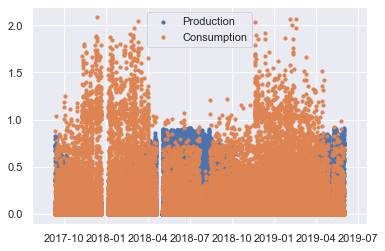

/opt/jupyterhub/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/jupyterhub/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/jupyterhub/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/jupyterhub/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/jupyterhub/anaconda/lib/python3.6/site-packages/skle

Accuracy on training: 0.365
Accuracy on test: 0.368
0.3675020092058157
True:  [1 1 1 1 3 3 2 3 1 2 2 4 4 3 2 4 3 1 2 1]
False: [1 4 4 4 4 2 4 4 4 2 4 4 4 2 2 4 4 4 2 4]
              precision    recall  f1-score   support

           1       0.40      0.25      0.31      3841
           2       0.40      0.35      0.37      3228
           3       0.00      0.00      0.00      2448
           4       0.35      0.70      0.46      4170

    accuracy                           0.37     13687
   macro avg       0.29      0.33      0.29     13687
weighted avg       0.31      0.37      0.32     13687


Logistic Regression with C=5 

Accuracy on training: 0.365
Accuracy on test: 0.368
0.3675020092058157
True:  [1 1 1 1 3 3 2 3 1 2 2 4 4 3 2 4 3 1 2 1]
False: [1 4 4 4 4 2 4 4 4 2 4 4 4 2 2 4 4 4 2 4]


/opt/jupyterhub/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/jupyterhub/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/jupyterhub/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/jupyterhub/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           1       0.40      0.25      0.31      3841
           2       0.40      0.35      0.37      3228
           3       0.00      0.00      0.00      2448
           4       0.35      0.70      0.46      4170

    accuracy                           0.37     13687
   macro avg       0.29      0.33      0.29     13687
weighted avg       0.31      0.37      0.32     13687


Logistic Regression with C=50 

Accuracy on training: 0.365
Accuracy on test: 0.367
0.3675020092058157
True:  [1 1 1 1 3 3 2 3 1 2 2 4 4 3 2 4 3 1 2 1]
False: [1 4 4 4 4 2 4 4 4 2 4 4 4 2 2 4 4 4 2 4]
              precision    recall  f1-score   support

           1       0.40      0.25      0.31      3841
           2       0.40      0.35      0.37      3228
           3       0.00      0.00      0.00      2448
           4       0.35      0.70      0.46      4170

    accuracy                           0.37     13687
   macro avg       0.29      0.33    

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn import metrics

import matplotlib.pyplot as plt
%matplotlib inline

target = df['Season']
consumption = df['H01_cons'].values
production = df['H01_prod'].values
data = np.array((consumption,production))

plt.scatter(df.index ,production, s=10, label='Production')
plt.scatter(df.index ,consumption, s=10, label='Consumption')
plt.legend()
plt.show()

X_train, X_test, y_train, y_test = train_test_split(np.transpose(data), np.transpose(target), random_state=42)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

print('Accuracy on training: {:.3f}'.format(log_reg.score(X_train, y_train)) )
print('Accuracy on test: {:.3f}'.format(log_reg.score(X_test, y_test)))

y_pred = log_reg.predict(X_test)

print(metrics.accuracy_score(y_test, y
                             _pred))

print('True: ', y_test.values[0:20])
print('False:', y_pred[0:20])

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))


print('\nLogistic Regression with C=5 \n')
log_reg100 = LogisticRegression(C=5)
log_reg100.fit(X_train, y_train)

print('Accuracy on training: {:.3f}'.format(log_reg100.score(X_train, y_train)) )
print('Accuracy on test: {:.3f}'.format(log_reg100.score(X_test, y_test)))

y_pred = log_reg.predict(X_test)

print(metrics.accuracy_score(y_test, y_pred))

print('True: ', y_test.values[0:20])
print('False:', y_pred[0:20])

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))


print('\nLogistic Regression with C=50 \n')
log_reg100 = LogisticRegression(C=50)
log_reg100.fit(X_train, y_train)

print('Accuracy on training: {:.3f}'.format(log_reg100.score(X_train, y_train)) )
print('Accuracy on test: {:.3f}'.format(log_reg100.score(X_test, y_test)))

y_pred = log_reg.predict(X_test)

print(metrics.accuracy_score(y_test, y_pred))

print('True: ', y_test.values[0:20])
print('False:', y_pred[0:20])

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

<h5>Logistic Regression with the target value: Hours</h5>

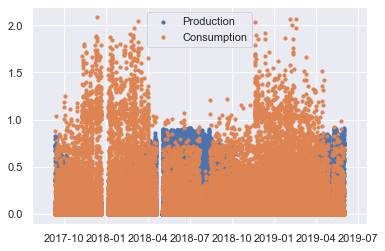

/opt/jupyterhub/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/jupyterhub/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy on training: 0.092
Accuracy on test: 0.087
0.08672462921019945
True:  [17  1 20  3  0  9  2  2  1 11  0 19  4 13 12  4  4 22 15  7]
False: [ 7  5  5  5  5 14  5  5  5 13  5  5  5 11 11  5  5  5 13  1]
              precision    recall  f1-score   support

           0       0.02      0.02      0.02       557
           1       0.01      0.01      0.01       559
           2       0.00      0.00      0.00       567
           3       0.00      0.00      0.00       583
           4       0.00      0.00      0.00       567
           5       0.08      0.92      0.15       544
           6       0.00      0.00      0.00       589
           7       0.11      0.25      0.15       620
           8       0.10      0.04      0.06       572
           9       0.08      0.08      0.08       551
          10       0.09      0.08      0.08       602
          11       0.09      0.06      0.07       535
          12       0.26      0.01      0.02       557
          13       0.17      0.25

/opt/jupyterhub/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/jupyterhub/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/jupyterhub/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy on training: 0.094
Accuracy on test: 0.088
0.08672462921019945
True:  [17  1 20  3  0  9  2  2  1 11  0 19  4 13 12  4  4 22 15  7]
False: [ 7  5  5  5  5 14  5  5  5 13  5  5  5 11 11  5  5  5 13  1]
              precision    recall  f1-score   support

           0       0.02      0.02      0.02       557
           1       0.01      0.01      0.01       559
           2       0.00      0.00      0.00       567
           3       0.00      0.00      0.00       583
           4       0.00      0.00      0.00       567
           5       0.08      0.92      0.15       544
           6       0.00      0.00      0.00       589
           7       0.11      0.25      0.15       620
           8       0.10      0.04      0.06       572
           9       0.08      0.08      0.08       551
          10       0.09      0.08      0.08       602
          11       0.09      0.06      0.07       535
          12       0.26      0.01      0.02       557
          13       0.17      0.25

/opt/jupyterhub/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/jupyterhub/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/jupyterhub/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy on training: 0.095
Accuracy on test: 0.089
0.08672462921019945
True:  [17  1 20  3  0  9  2  2  1 11  0 19  4 13 12  4  4 22 15  7]
False: [ 7  5  5  5  5 14  5  5  5 13  5  5  5 11 11  5  5  5 13  1]
              precision    recall  f1-score   support

           0       0.02      0.02      0.02       557
           1       0.01      0.01      0.01       559
           2       0.00      0.00      0.00       567
           3       0.00      0.00      0.00       583
           4       0.00      0.00      0.00       567
           5       0.08      0.92      0.15       544
           6       0.00      0.00      0.00       589
           7       0.11      0.25      0.15       620
           8       0.10      0.04      0.06       572
           9       0.08      0.08      0.08       551
          10       0.09      0.08      0.08       602
          11       0.09      0.06      0.07       535
          12       0.26      0.01      0.02       557
          13       0.17      0.25

/opt/jupyterhub/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn import metrics

import matplotlib.pyplot as plt
%matplotlib inline

target = df['Hours']
consumption = df['H01_cons'].values
production = df['H01_prod'].values
data = np.array((consumption,production))

plt.scatter(df.index ,production, s=10, label='Production')
plt.scatter(df.index ,consumption, s=10, label='Consumption')
plt.legend()
plt.show()

X_train, X_test, y_train, y_test = train_test_split(np.transpose(data), np.transpose(target), random_state=42)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

print('Accuracy on training: {:.3f}'.format(log_reg.score(X_train, y_train)) )
print('Accuracy on test: {:.3f}'.format(log_reg.score(X_test, y_test)))

y_pred = log_reg.predict(X_test)

print(metrics.accuracy_score(y_test, y_pred))

print('True: ', y_test.values[0:20])
print('False:', y_pred[0:20])

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))


print('\nLogistic Regression with C=5 \n')
log_reg100 = LogisticRegression(C=5)
log_reg100.fit(X_train, y_train)

print('Accuracy on training: {:.3f}'.format(log_reg100.score(X_train, y_train)) )
print('Accuracy on test: {:.3f}'.format(log_reg100.score(X_test, y_test)))

y_pred = log_reg.predict(X_test)

print(metrics.accuracy_score(y_test, y_pred))

print('True: ', y_test.values[0:20])
print('False:', y_pred[0:20])

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))


print('\nLogistic Regression with C=50 \n')
log_reg100 = LogisticRegression(C=50)
log_reg100.fit(X_train, y_train)

print('Accuracy on training: {:.3f}'.format(log_reg100.score(X_train, y_train)) )
print('Accuracy on test: {:.3f}'.format(log_reg100.score(X_test, y_test)))

y_pred = log_reg.predict(X_test)

print(metrics.accuracy_score(y_test, y_pred))

print('True: ', y_test.values[0:20])
print('False:', y_pred[0:20])

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

<h5>Logistic Regression with the target value: Day_of_the_week</h5>

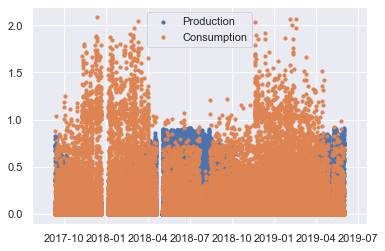

/opt/jupyterhub/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/jupyterhub/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/jupyterhub/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy on training: 0.152
Accuracy on test: 0.154
0.15350332432234967
True:  [4 3 6 2 1 4 3 5 5 5 6 2 3 4 6 7 1 2 5 3]
False: [6 4 4 4 4 1 4 4 4 1 4 4 4 2 2 4 4 4 1 4]
              precision    recall  f1-score   support

           1       0.15      0.16      0.16      1856
           2       0.15      0.07      0.10      1961
           3       0.00      0.00      0.00      1908
           4       0.15      0.58      0.24      2006
           5       0.00      0.00      0.00      2021
           6       0.16      0.24      0.19      2044
           7       0.21      0.00      0.00      1891

    accuracy                           0.15     13687
   macro avg       0.12      0.15      0.10     13687
weighted avg       0.12      0.15      0.10     13687


Logistic Regression with C=5 



/opt/jupyterhub/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/jupyterhub/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy on training: 0.152
Accuracy on test: 0.154
0.15350332432234967
True:  [4 3 6 2 1 4 3 5 5 5 6 2 3 4 6 7 1 2 5 3]
False: [6 4 4 4 4 1 4 4 4 1 4 4 4 2 2 4 4 4 1 4]
              precision    recall  f1-score   support

           1       0.15      0.16      0.16      1856
           2       0.15      0.07      0.10      1961
           3       0.00      0.00      0.00      1908
           4       0.15      0.58      0.24      2006
           5       0.00      0.00      0.00      2021
           6       0.16      0.24      0.19      2044
           7       0.21      0.00      0.00      1891

    accuracy                           0.15     13687
   macro avg       0.12      0.15      0.10     13687
weighted avg       0.12      0.15      0.10     13687


Logistic Regression with C=50 



/opt/jupyterhub/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/jupyterhub/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/jupyterhub/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy on training: 0.152
Accuracy on test: 0.154
0.15350332432234967
True:  [4 3 6 2 1 4 3 5 5 5 6 2 3 4 6 7 1 2 5 3]
False: [6 4 4 4 4 1 4 4 4 1 4 4 4 2 2 4 4 4 1 4]
              precision    recall  f1-score   support

           1       0.15      0.16      0.16      1856
           2       0.15      0.07      0.10      1961
           3       0.00      0.00      0.00      1908
           4       0.15      0.58      0.24      2006
           5       0.00      0.00      0.00      2021
           6       0.16      0.24      0.19      2044
           7       0.21      0.00      0.00      1891

    accuracy                           0.15     13687
   macro avg       0.12      0.15      0.10     13687
weighted avg       0.12      0.15      0.10     13687



/opt/jupyterhub/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn import metrics

import matplotlib.pyplot as plt
%matplotlib inline

target = df['Day_of_the_week']
consumption = df['H01_cons'].values
production = df['H01_prod'].values
data = np.array((consumption,production))

plt.scatter(df.index ,production, s=10, label='Production')
plt.scatter(df.index ,consumption, s=10, label='Consumption')
plt.legend()
plt.show()

X_train, X_test, y_train, y_test = train_test_split(np.transpose(data), np.transpose(target), random_state=42)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

print('Accuracy on training: {:.3f}'.format(log_reg.score(X_train, y_train)) )
print('Accuracy on test: {:.3f}'.format(log_reg.score(X_test, y_test)))

y_pred = log_reg.predict(X_test)

print(metrics.accuracy_score(y_test, y_pred))

print('True: ', y_test.values[0:20])
print('False:', y_pred[0:20])

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))


print('\nLogistic Regression with C=5 \n')
log_reg100 = LogisticRegression(C=5)
log_reg100.fit(X_train, y_train)

print('Accuracy on training: {:.3f}'.format(log_reg100.score(X_train, y_train)) )
print('Accuracy on test: {:.3f}'.format(log_reg100.score(X_test, y_test)))

y_pred = log_reg.predict(X_test)

print(metrics.accuracy_score(y_test, y_pred))

print('True: ', y_test.values[0:20])
print('False:', y_pred[0:20])

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))


print('\nLogistic Regression with C=50 \n')
log_reg100 = LogisticRegression(C=50)
log_reg100.fit(X_train, y_train)

print('Accuracy on training: {:.3f}'.format(log_reg100.score(X_train, y_train)) )
print('Accuracy on test: {:.3f}'.format(log_reg100.score(X_test, y_test)))

y_pred = log_reg.predict(X_test)

print(metrics.accuracy_score(y_test, y_pred))

print('True: ', y_test.values[0:20])
print('False:', y_pred[0:20])

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))  

<h5>Logistic Regression with the target value: Part_of_the_day</h5>

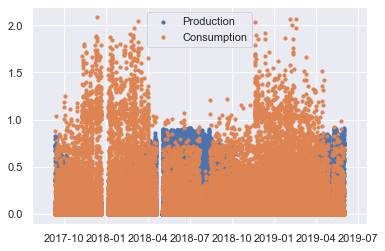

/opt/jupyterhub/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/jupyterhub/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/jupyterhub/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/jupyterhub/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy on training: 0.471
Accuracy on test: 0.464
0.4637247022722291
True:  [3 1 4 1 1 2 1 1 1 2 1 4 1 3 3 1 1 4 3 2]
False: [4 1 1 1 1 3 1 1 1 3 1 1 1 3 3 1 1 1 3 1]
              precision    recall  f1-score   support

           1       0.45      0.92      0.60      3377
           2       0.38      0.08      0.14      3469
           3       0.64      0.57      0.60      3381
           4       0.35      0.30      0.32      3460

    accuracy                           0.46     13687
   macro avg       0.45      0.47      0.42     13687
weighted avg       0.45      0.46      0.41     13687


Logistic Regression with C=5 

Accuracy on training: 0.473
Accuracy on test: 0.465
0.4637247022722291
True:  [3 1 4 1 1 2 1 1 1 2 1 4 1 3 3 1 1 4 3 2]
False: [4 1 1 1 1 3 1 1 1 3 1 1 1 3 3 1 1 1 3 1]
              precision    recall  f1-score   support

           1       0.45      0.92      0.60      3377
           2       0.38      0.08      0.14      3469
           3       0.64      0.5

/opt/jupyterhub/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/jupyterhub/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy on training: 0.475
Accuracy on test: 0.467
0.4637247022722291
True:  [3 1 4 1 1 2 1 1 1 2 1 4 1 3 3 1 1 4 3 2]
False: [4 1 1 1 1 3 1 1 1 3 1 1 1 3 3 1 1 1 3 1]
              precision    recall  f1-score   support

           1       0.45      0.92      0.60      3377
           2       0.38      0.08      0.14      3469
           3       0.64      0.57      0.60      3381
           4       0.35      0.30      0.32      3460

    accuracy                           0.46     13687
   macro avg       0.45      0.47      0.42     13687
weighted avg       0.45      0.46      0.41     13687



In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn import metrics

import matplotlib.pyplot as plt
%matplotlib inline

target = df['Part_of_the_day']
consumption = df['H01_cons'].values
production = df['H01_prod'].values
data = np.array((consumption,production))

plt.scatter(df.index ,production, s=10, label='Production')
plt.scatter(df.index ,consumption, s=10, label='Consumption')
plt.legend()
plt.show()

X_train, X_test, y_train, y_test = train_test_split(np.transpose(data), np.transpose(target), random_state=42)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

print('Accuracy on training: {:.3f}'.format(log_reg.score(X_train, y_train)) )
print('Accuracy on test: {:.3f}'.format(log_reg.score(X_test, y_test)))

y_pred = log_reg.predict(X_test)

print(metrics.accuracy_score(y_test, y_pred))

print('True: ', y_test.values[0:20])
print('False:', y_pred[0:20])

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))


print('\nLogistic Regression with C=5 \n')
log_reg100 = LogisticRegression(C=5)
log_reg100.fit(X_train, y_train)

print('Accuracy on training: {:.3f}'.format(log_reg100.score(X_train, y_train)) )
print('Accuracy on test: {:.3f}'.format(log_reg100.score(X_test, y_test)))

y_pred = log_reg.predict(X_test)

print(metrics.accuracy_score(y_test, y_pred))

print('True: ', y_test.values[0:20])
print('False:', y_pred[0:20])

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))


print('\nLogistic Regression with C=50 \n')
log_reg100 = LogisticRegression(C=50)
log_reg100.fit(X_train, y_train)

print('Accuracy on training: {:.3f}'.format(log_reg100.score(X_train, y_train)) )
print('Accuracy on test: {:.3f}'.format(log_reg100.score(X_test, y_test)))

y_pred = log_reg.predict(X_test)

print(metrics.accuracy_score(y_test, y_pred))

print('True: ', y_test.values[0:20])
print('False:', y_pred[0:20])

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))  